This notebook uses the plots from the following paper to explain Matplotlib is Chen et al, "Brain-wide Organization of Neuronal Activity and Convergent Sensorimotor Transformations in Larval
Zebrafish", Neuron, 2018.


Data for this notebook can be downloaded from https://janelia.figshare.com/articles/Whole-brain_light-sheet_imaging_data/7272617

We rely on the following matplotlib book for material https://matplotlib.org/2.0.2/Matplotlib.pdf

# Importing necessary libraries

In [24]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from scipy.io import loadmat
import h5py
from sklearn.cluster import KMeans

We first load in the data.

In [3]:
path='/media/maria/DATA1/Documents/ZebraFish/subject_1/'

In [19]:
beh_dat=loadmat(path+'data_full.mat')['data']['Behavior_full'][0][0]
stim_dat=loadmat(path+'data_full.mat')['data']['stim_full'][0][0]
hf = h5py.File(path+'TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])
cell_pos=loadmat(path+'data_full.mat')['data']['CellXYZ'][0][0]
missing_values=loadmat(path+'data_full.mat')['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [20]:
#Grab some random neurons
np.seed=7
random_neurons=np.random.choice(neural_dat.shape[1],10000,replace=False)

cell_pos=cell_pos[random_neurons,:]

# Chapter 3.2 from the Matplotlib book-- Intermediate

[]

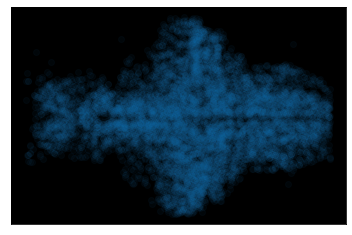

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch # a Rectangle instance
rect.set_facecolor('black')

ax.scatter(cell_pos[:,0], cell_pos[:,1], cmap='bwr', alpha = .05)
ax.set_yticks([])
ax.set_xticks([])

Let's cluster the random cells using k-means clustering.

In [63]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(neural_dat[:1000,random_neurons].T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

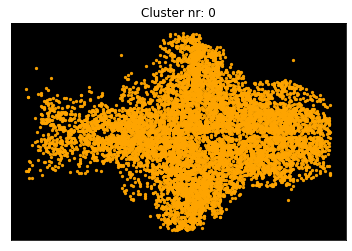

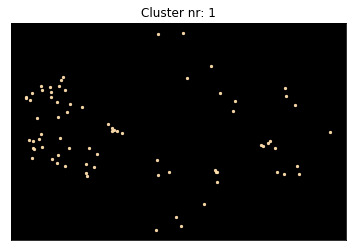

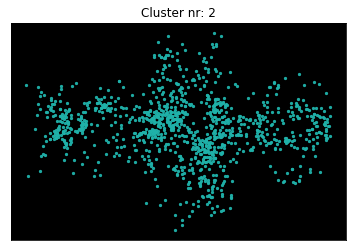

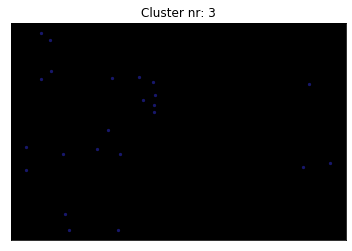

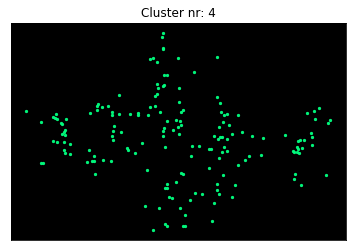

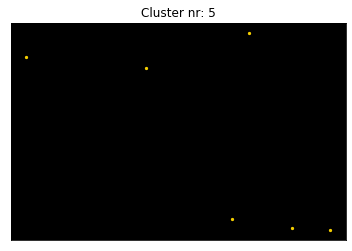

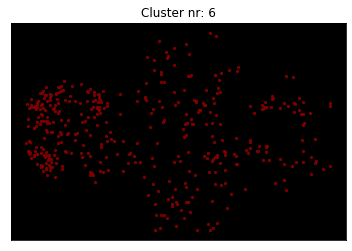

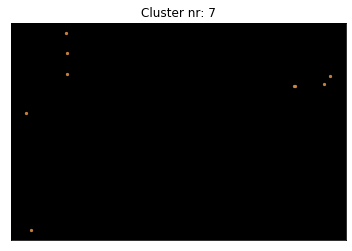

In [69]:
colors=['orange','navajowhite','lightseagreen','midnightblue','springgreen','gold','maroon','peru']
for cluster in range(0,8):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rect = ax.patch # a Rectangle instance
    rect.set_facecolor('black')
    inds=np.where(kmeans.labels_==cluster)
    #print(inds)
    ax.scatter(cell_pos[inds,0], cell_pos[inds,1], c=colors[cluster], alpha = .95,s=5)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.title('Cluster nr: '+str(cluster))
    plt.show()
    

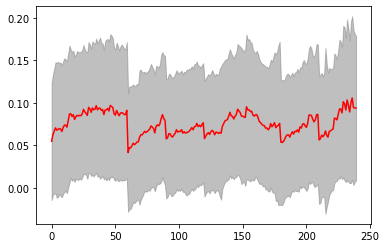

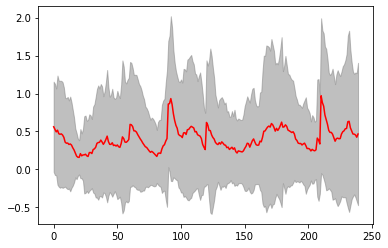

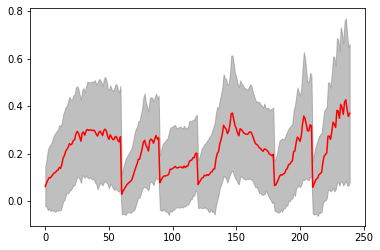

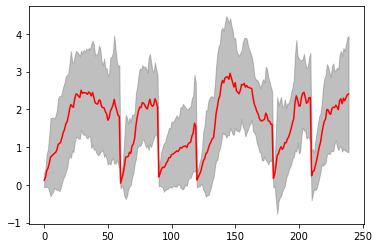

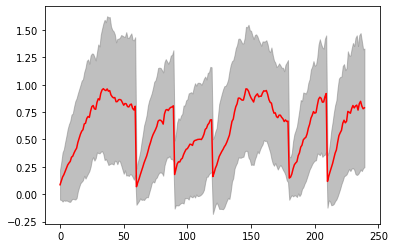

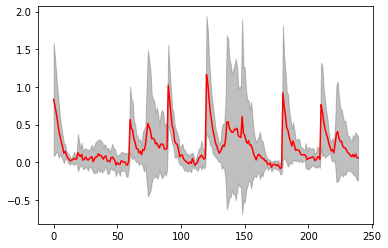

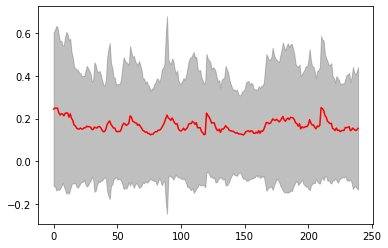

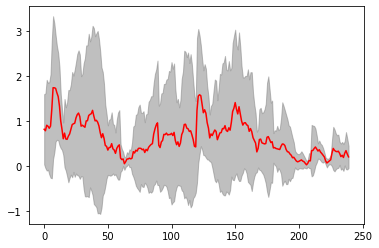

In [129]:
unique_stims=np.unique(stim_dat)
neurons=neural_dat[:1000,random_neurons]
stim_dat_=stim_dat.flatten()[:1000]
for cluster in range(0,8):
    inds=np.where(kmeans.labels_==cluster)[0]
    stims=np.where(stim_dat_==0)[0]
    nn = neurons[np.ix_(stims,inds)]
    mean=np.mean(nn,axis=1)
    std=np.std(nn,axis=1)
    plt.plot(np.arange(0,std.shape[0]),mean,c='red')
    plt.fill_between(np.arange(0,std.shape[0]), mean-std, mean+std,alpha=0.5,color='gray')
    plt.show()

In [39]:
print(neural_dat.shape)

(2880, 83205)
